In [198]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
with open('../input/zdelta/weight_zscore_rf_delta_data.pickle', 'rb') as fh:
    x, y, tf_list = pickle.load(fh)

In [219]:
df = pd.DataFrame(np.sum(x, axis=1, dtype=np.int32), columns=['delta feature sum'])
df['delta zpsi'] = y['PSI']

In [220]:
df1 = df[df['delta feature sum'] < 50]
df2 = df1[df1['delta zpsi'] > 2]
sd2_count = df2.groupby('delta feature sum').count().reset_index()
sd2_count = sd2_count.rename(columns = {'delta zpsi':'counts of delta zpsi > 2'})

In [221]:
labels = ['{0:.0f} - {1:.0f}'.format(i, i + 1) for i in np.linspace(0,4,5)]

In [222]:
labels

['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5']

In [223]:
df1['group'] = pd.cut(df1['delta zpsi'], len(labels), right=False, labels=labels)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
df1

,delta feature sum,delta zpsi,group
0,34,0.573992,0 - 1
5,32,1.147984,1 - 2
8,45,1.607177,1 - 2
43,45,1.262782,1 - 2
53,43,2.755161,2 - 3
56,40,0.114798,0 - 1
57,34,0.344395,0 - 1
58,49,0.114798,0 - 1
59,28,0.573992,0 - 1
64,40,0.229597,0 - 1


In [225]:
df1_count_by_group = df1.groupby(['delta feature sum', 'group']).count().reset_index()

In [226]:
df1_pivot = df1_count_by_group.pivot('group', 'delta feature sum', 'delta zpsi')

In [227]:
df1_pivot = df1_pivot.iloc[::-1]

In [228]:
df1_pivot[df1_pivot.isna()] = 0

In [229]:
df1_pivot

delta feature sum,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
group,,,,,,,,,,,,,,,,,,,,,
4 - 5,0.0,2.0,1.0,1.0,1.0,0.0,2.0,4.0,3.0,5.0,...,40.0,39.0,41.0,56.0,48.0,49.0,40.0,55.0,56.0,46.0
3 - 4,0.0,2.0,8.0,6.0,7.0,14.0,29.0,21.0,30.0,48.0,...,317.0,277.0,274.0,281.0,299.0,304.0,304.0,360.0,329.0,318.0
2 - 3,5.0,16.0,29.0,23.0,28.0,39.0,78.0,71.0,99.0,124.0,...,708.0,703.0,695.0,703.0,720.0,749.0,760.0,721.0,786.0,821.0
1 - 2,21.0,47.0,58.0,60.0,74.0,100.0,126.0,165.0,193.0,251.0,...,1187.0,1176.0,1219.0,1213.0,1228.0,1244.0,1288.0,1346.0,1318.0,1390.0
0 - 1,81.0,150.0,234.0,263.0,269.0,380.0,470.0,539.0,615.0,681.0,...,2391.0,2515.0,2499.0,2558.0,2507.0,2720.0,2779.0,2778.0,2913.0,2895.0


In [230]:
norm_df1_pivot = df1_pivot.div(df1_pivot.sum(axis=0), axis=1)

In [231]:
norm_df1_pivot

delta feature sum,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
group,,,,,,,,,,,,,,,,,,,,,
4 - 5,0.000000,0.009217,0.003030,0.002833,0.002639,0.000000,0.002837,0.00500,0.003191,0.004509,...,0.008615,0.008280,0.008672,0.011640,0.009996,0.009672,0.007735,0.010456,0.010367,0.008410
3 - 4,0.000000,0.009217,0.024242,0.016997,0.018470,0.026266,0.041135,0.02625,0.031915,0.043282,...,0.068275,0.058811,0.057953,0.058408,0.062266,0.060008,0.058789,0.068441,0.060903,0.058135
2 - 3,0.046729,0.073733,0.087879,0.065156,0.073879,0.073171,0.110638,0.08875,0.105319,0.111812,...,0.152488,0.149257,0.146997,0.146123,0.149938,0.147848,0.146974,0.137072,0.145502,0.150091
1 - 2,0.196262,0.216590,0.175758,0.169972,0.195251,0.187617,0.178723,0.20625,0.205319,0.226330,...,0.255654,0.249682,0.257826,0.252131,0.255727,0.245559,0.249081,0.255894,0.243984,0.254113
0 - 1,0.757009,0.691244,0.709091,0.745042,0.709763,0.712946,0.666667,0.67375,0.654255,0.614067,...,0.514969,0.533970,0.528553,0.531698,0.522074,0.536913,0.537420,0.528137,0.539245,0.529250


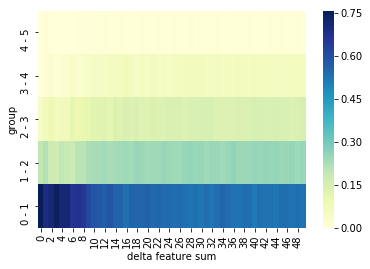

In [232]:
ax = sns.heatmap(norm_df1_pivot, cmap="YlGnBu")

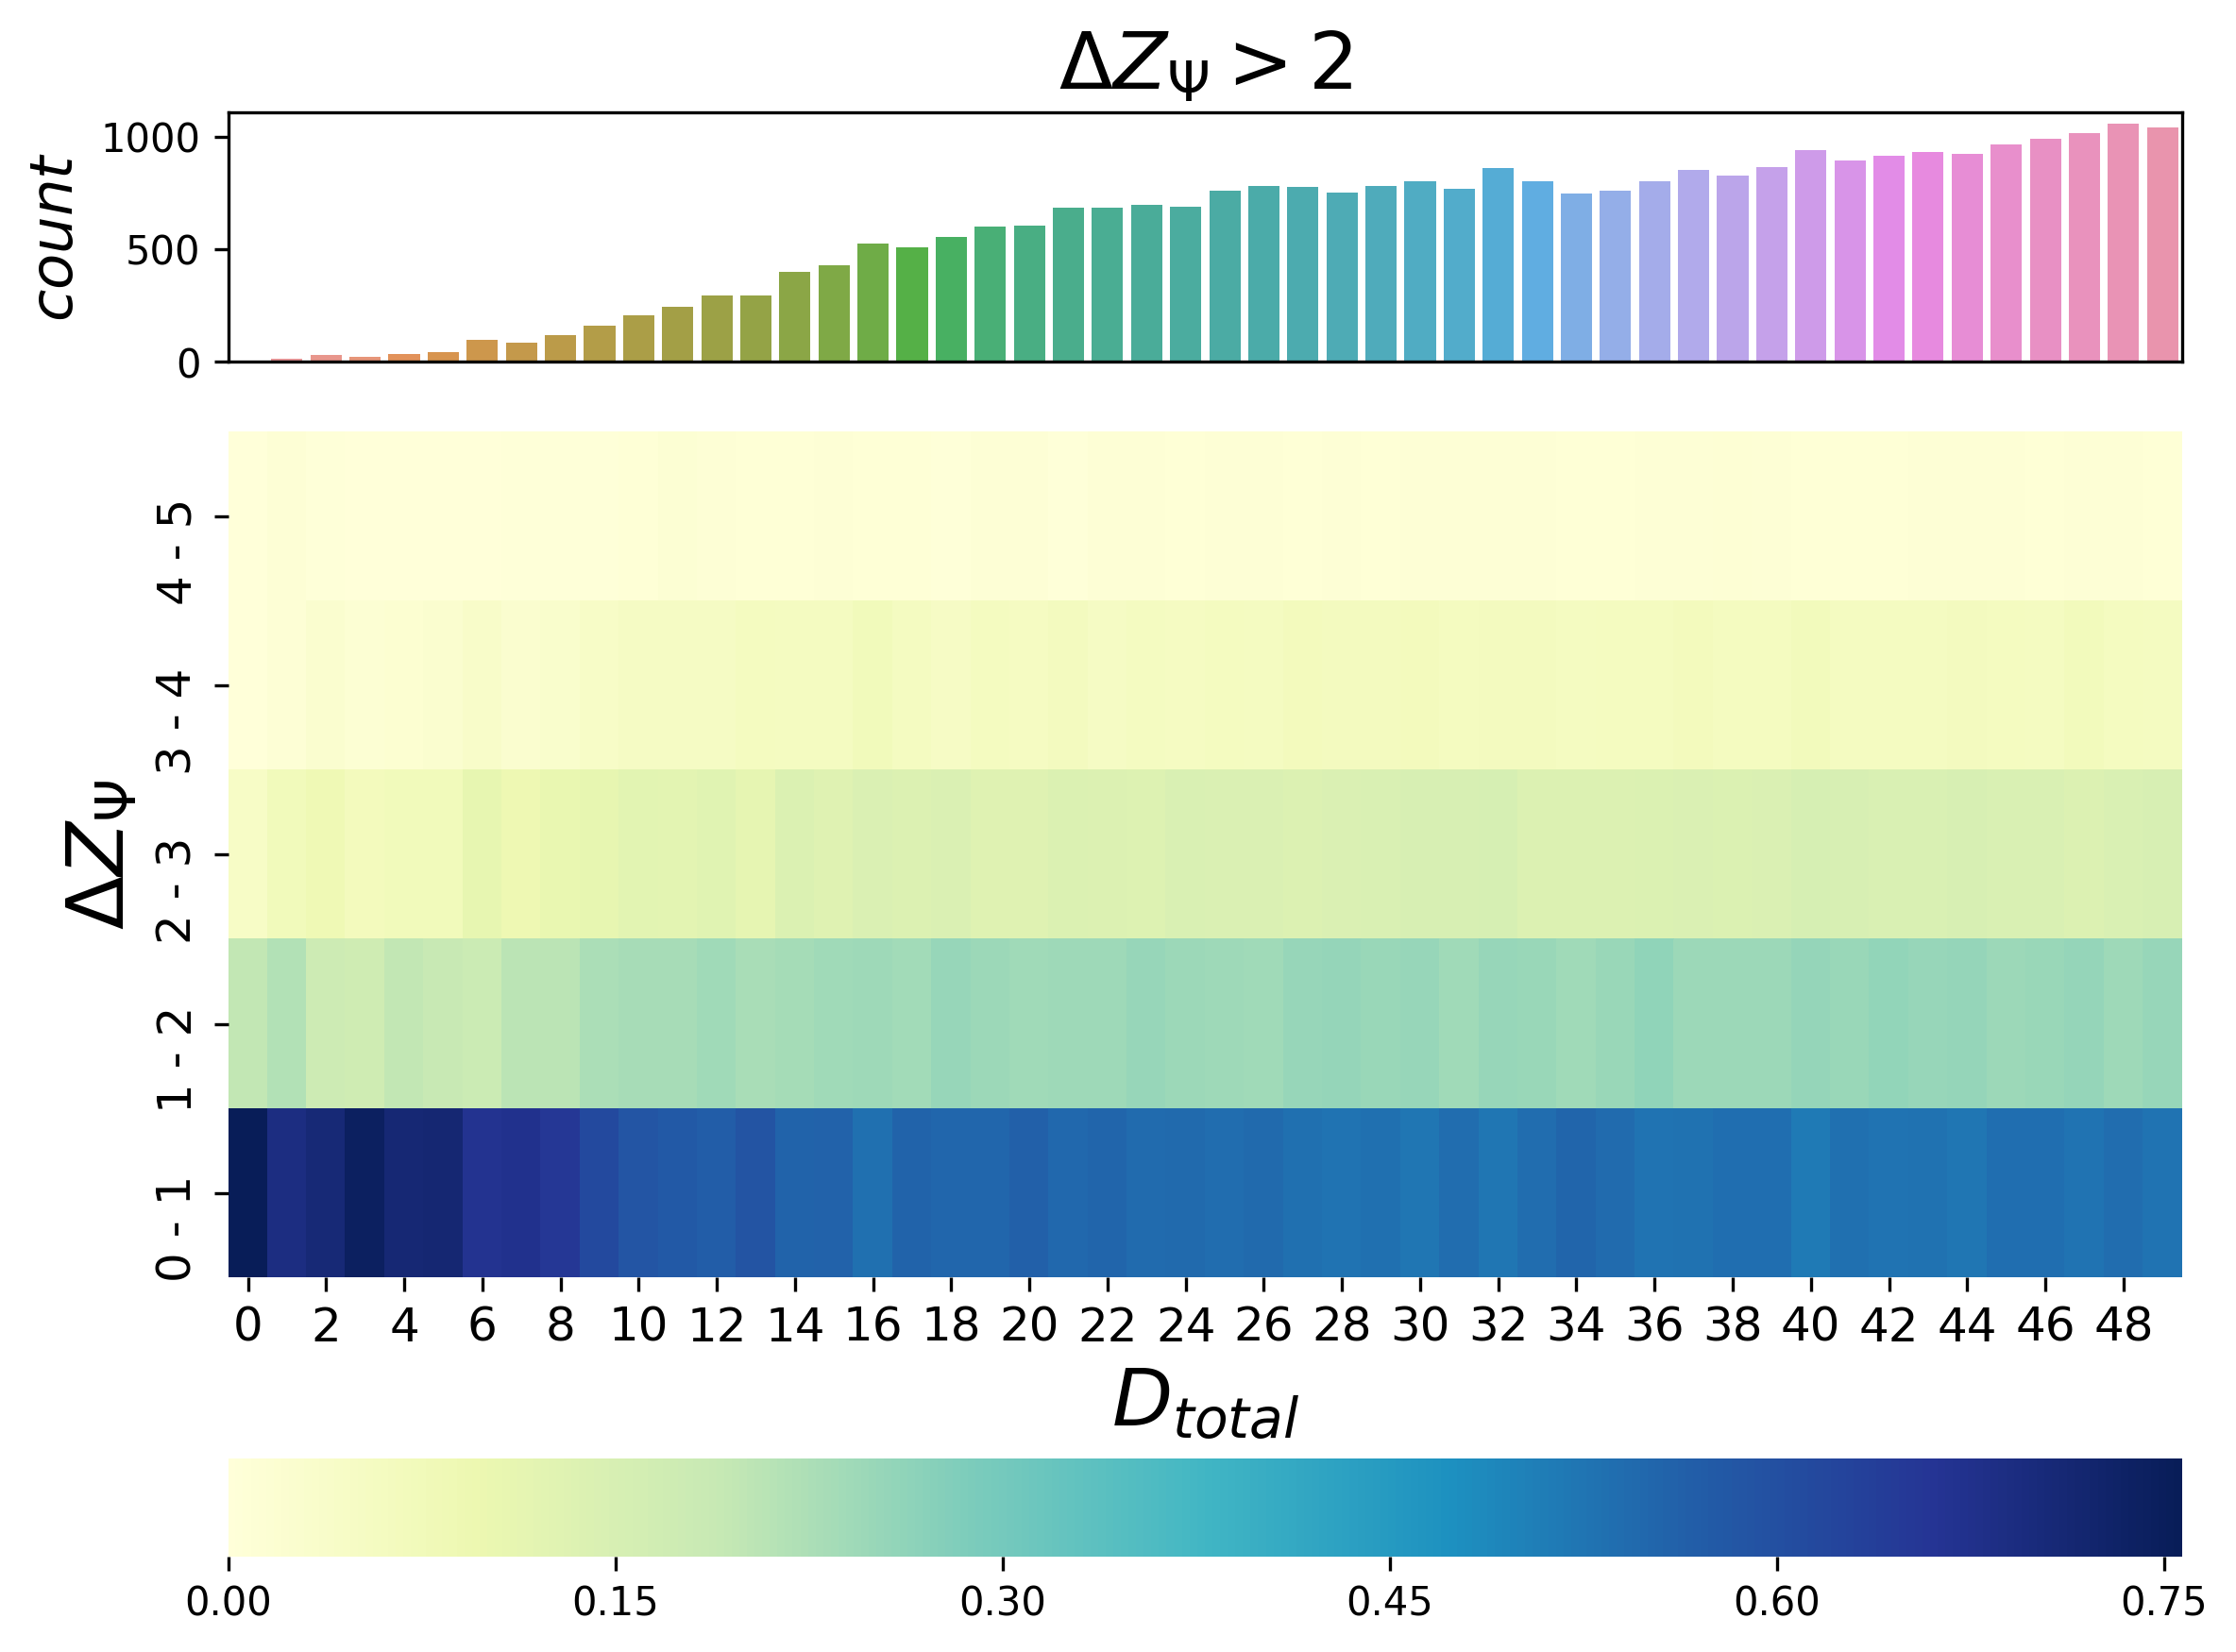

In [233]:
# feature as x and psi as y
fig = plt.figure(figsize=(8.0, 6.0), dpi=300)
# gridspec.GridSpec(8,1)
# plt.subplot2grid((3,1), (1,0), rowspan=7)
# fig, ax = plt.subplots(2, 1, figsize=(12.0, 12.0), sharex='col')
plt.subplot(5, 1, (2,5))
ax = sns.heatmap(norm_df1_pivot, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})
ax.set_xlabel(r'$D_{total}$', fontsize=20)
ax.set_ylabel(r'$\Delta Z_{\Psi}$', fontsize=20)
ax.tick_params(labelsize=12)
# plt.subplot2grid((3,1), (0,0))
plt.subplot(5, 1, 1)
ax = sns.barplot(x="delta feature sum", y="counts of delta zpsi > 2", data=sd2_count)
ax.set_ylabel(r'$count$', fontsize=15)
ax.axes.get_xaxis().set_visible(False)
ax.set_title(r'$\Delta Z_{\Psi} > 2$', fontsize=20)
fig.tight_layout()
plt.show()
# plt.savefig('results/box_plot.png', dpi=300)